In [23]:
import re

import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras import layers, losses, metrics, optimizers
import tensorflow as tf
from tensorflow.keras import Sequential
# noinspection PyInterpreter
from tensorflow.keras.metrics import AUC, Precision, Recall, F1Score
from keras_preprocessing.sequence import pad_sequences
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, \
    confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras_preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from itertools import product


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\57459N\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def plot_confusion_matrix_and_print_metrics(y_pred, y_true):
    conf_matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt="d")
    ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['No Spam', 'Spam'])
    ax.set_ylabel("Actual", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['No Spam', 'Spam'])
    plt.show()
    print(conf_matrix)
    print(classification_report(y_true, y_pred))


def print_model(_model, preds, trues):
    print(_model)
    print(f'\taccuracy: {accuracy_score(preds, trues)}')
    print(f'\tprecision: {precision_score(trues, preds)}')
    print(f'\trecall: {recall_score(trues, preds)}')
    print(f'\tf1: {f1_score(preds, trues)}')
    print(f'\troc_auc: {roc_auc_score(preds, trues)}')

def visualize_model(preds, trues, probs=None):
    if probs is not None:
        ns_probs = [0 for _ in range(len(trues))]
        fpr, tpr, _ = roc_curve(trues, probs)
        plt.plot(fpr, tpr)
        fpr, tpr, _ = roc_curve(trues, ns_probs)
        plt.plot(fpr, tpr)

    plt.figure()
    plot_confusion_matrix_and_print_metrics(preds, trues)
    

def train_and_eval_model(max_features: int, max_depth: int, verbose=False) -> float:
    vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
    X = vectorizer.fit_transform(corpus).toarray()
    y = data['spam']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    rf_clf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf_clf.fit(X_train, y_train)

    probs = rf_clf.predict_proba(X_test)[:, 1]
    preds = rf_clf.predict(X_test)
    
    if verbose:
        visualize_model(preds, y_test, probs)
        print_model(rf_clf, preds, y_test)
        

    return roc_auc_score(y_test, preds)

In [4]:
data = pd.read_csv('data/dataset_lab2.csv')
data.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [5]:
text = data['text']

# Only words and digits separated with space, then lower< then split, then remove common word 'subject'   
text = text.apply(lambda x:
                  re.sub('[^a-zA-Z0-9]+', ' ', x)
                  .lower()
                  .split()
                  [1:])
text

0       [naturally, irresistible, your, corporate, ide...
1       [the, stock, trading, gunslinger, fanny, is, m...
2       [unbelievable, new, homes, made, easy, im, wan...
3       [4, color, printing, special, request, additio...
4       [do, not, have, money, get, software, cds, fro...
                              ...                        
5723    [re, research, and, development, charges, to, ...
5724    [re, receipts, from, visit, jim, thanks, again...
5725    [re, enron, case, study, update, wow, all, on,...
5726    [re, interest, david, please, call, shirley, c...
5727    [news, aurora, 5, 2, update, aurora, version, ...
Name: text, Length: 5728, dtype: object

In [6]:
ps = PorterStemmer()
stops = set(stopwords.words('english'))
# remove stops
text = text.map(lambda l: list(filter(lambda x: x not in stops, l)))
print(text[0])
# stem
text = text.map(lambda l: list(map(lambda x: ps.stem(x), l)))
print(text[0])

['naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 'affordabil

In [7]:
corpus = text.map(lambda x: ' '.join(x))

corpus

0       natur irresist corpor ident lt realli hard rec...
1       stock trade gunsling fanni merril muzo colza a...
2       unbeliev new home made easi im want show homeo...
3       4 color print special request addit inform cli...
4       money get softwar cd softwar compat great grow...
                              ...                        
5723    research develop charg gpg forward shirley cre...
5724    receipt visit jim thank invit visit lsu shirle...
5725    enron case studi updat wow day super thank muc...
5726    interest david pleas call shirley crenshaw ass...
5727    news aurora 5 2 updat aurora version 5 2 faste...
Name: text, Length: 5728, dtype: object

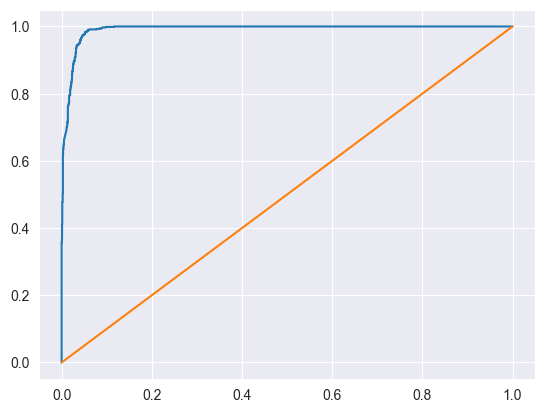

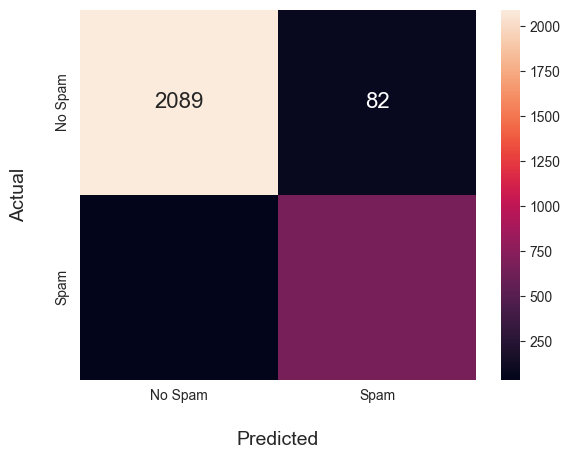

[[2089   82]
 [  36  657]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2171
           1       0.89      0.95      0.92       693

    accuracy                           0.96      2864
   macro avg       0.94      0.96      0.95      2864
weighted avg       0.96      0.96      0.96      2864

RandomForestClassifier(max_depth=14, n_jobs=-1)
	accuracy: 0.9587988826815642
	precision: 0.8890392422192152
	recall: 0.948051948051948
	f1: 0.9175977653631285
	roc_auc: 0.9360490328743135


In [8]:
feats = [150]
depths = [14]

roc_scores = np.array([[train_and_eval_model(f, d, verbose=True) for f in feats] for d in depths])

[]

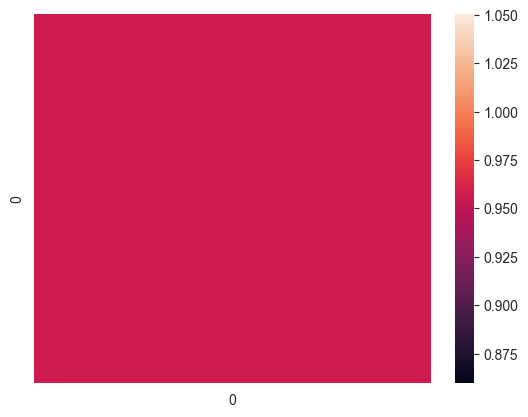

In [9]:
sns.heatmap(roc_scores)
plt.plot()

In [10]:
top = 5
if len(roc_scores) >= top:
    flat = roc_scores.flatten()
    ind = np.argpartition(flat, -top)[-top:]
    ind = ind[np.argsort(flat[ind])[::-1]]
    best_params = np.array(list(product(feats, depths)))[ind]
    print('score\tfeats depth')
    for i, j in zip(best_params, flat[ind]):
        print(f'{j:.5f}, {i}')
else:
    print(f'top {top} is too big. got only {len(roc_scores)} scores')

top 5 is too big. got only 1 scores


In [11]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=150)
X = vectorizer.fit_transform(corpus).toarray()
y = data['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


LSTM

In [12]:
y =abs( y-1)
text_train, text_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=0)

In [13]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(text_train)
sequences = tokenizer.texts_to_sequences(text_train)

In [14]:
sequences_matrix = pad_sequences(sequences, maxlen=150)

In [15]:
sequences_matrix

array([[  0,   0,   0, ..., 194, 134, 135],
       [  0,   0,   0, ...,  52,  27,  66],
       [  0,   0,   0, ...,  70, 159, 349],
       ...,
       [  0,   0,   0, ..., 297, 351, 275],
       [  0,   0,   0, ..., 193, 312,  12],
       [  0,   0,   0, ..., 194,  68,  51]])

In [16]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [24]:
with tf.device('/GPU:0'):
    model = Sequential([
        layers.Embedding(input_dim=500, output_dim=32),
        layers.LSTM(64),
        layers.Dense(1, activation='sigmoid')
    ])

model.compile(loss=losses.binary_crossentropy,
                   optimizer=optimizers.RMSprop(), metrics=['accuracy', F1Score, AUC, Precision, Recall])
model.fit(sequences_matrix, y_train, batch_size=128,
               epochs=5, validation_split=0.1)

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.7506 - auc: 0.6112 - f1_score: 0.8596 - loss: 0.5884 - precision: 0.7760 - recall: 0.9408 - val_accuracy: 0.9346 - val_auc: 0.9796 - val_f1_score: 0.8695 - val_loss: 0.2726 - val_precision: 0.9549 - val_recall: 0.9603
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.9183 - auc: 0.9380 - f1_score: 0.8586 - loss: 0.2731 - precision: 0.9389 - recall: 0.9539 - val_accuracy: 0.9717 - val_auc: 0.9929 - val_f1_score: 0.8695 - val_loss: 0.1148 - val_precision: 0.9857 - val_recall: 0.9773
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.9334 - auc: 0.9084 - f1_score: 0.8644 - loss: 0.2755 - precision: 0.9440 - recall: 0.9711 - val_accuracy: 0.9739 - val_auc: 0.9967 - val_f1_score: 0.8695 - val_loss: 0.0753 - val_precision: 0.9858 - val_recall: 0.9802
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9789 - auc: 0.9954 - f1_score: 0.8667 - loss: 0.0799 - precision: 0.9915 - recall: 0.9

In [25]:
test_s = tokenizer.texts_to_sequences(text_test)
test_sm = pad_sequences(test_s, maxlen=150)
model.evaluate(test_sm, y_test)

# visualize_model(classifier.fit(X_test), y_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9651 - auc: 0.9938 - f1_score: 0.8574 - loss: 0.0929 - precision: 0.9856 - recall: 0.9675


[0.09104713797569275,
 0.9659686088562012,
 0.9932700991630554,
 0.8714917898178101,
 0.9850917458534241,
 0.9706214666366577]